### Create skyview factor

In [1]:
from osgeo import gdal, osr
from topocalc.viewf import viewf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in DEM
# d = "/uufs/chpc.utah.edu/common/home/skiles-group1/jmeyer/project-data/iSnobal/ERW/topo/basin_setup/topo.nc"
# d = "/uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data/toponc_ERW/topo.nc"
# d = '/uufs/chpc.utah.edu/common/home/skiles-group2/pnaple/DRFS-Fusion/fusion_files/DEM/034033_merged.tif'
d = '/uufs/chpc.utah.edu/common/home/skiles-group2/pnaple/DRFS-Fusion/fusion_files/DEM/034033_lower_right.tif'
topo = gdal.Open(d, gdal.GA_ReadOnly)
topo.RasterCount

1

In [3]:
# convert elevation to type for tpocalc
dem = topo.GetRasterBand(1).ReadAsArray()
dem = dem.astype(np.double)
dem

array([[3065., 3059., 3053., ..., 1873., 1873., 1873.],
       [3065., 3063., 3059., ..., 1873., 1873., 1873.],
       [3066., 3060., 3057., ..., 1873., 1873., 1873.],
       ...,
       [2549., 2546., 2544., ..., 1737., 1738., 1739.],
       [2548., 2546., 2543., ..., 1737., 1738., 1739.],
       [2548., 2546., 2544., ..., 1737., 1738., 1739.]])

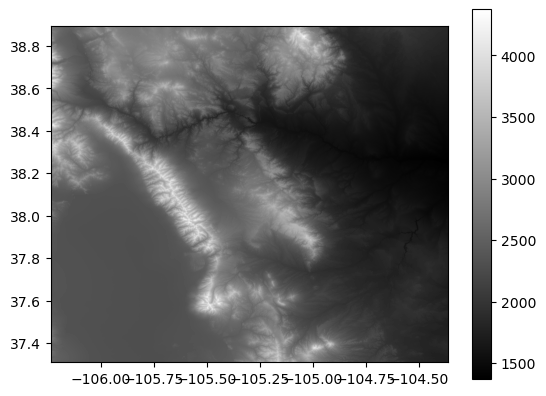

In [4]:
# plot DEM
# Read the data from the first band
band = topo.GetRasterBand(1)
data = band.ReadAsArray()

# Get the geotransform information
geotransform = topo.GetGeoTransform()

# Plot the data
plt.imshow(data, cmap='gray', extent=[geotransform[0], geotransform[0] + geotransform[1] * topo.RasterXSize,
                                      geotransform[3] + geotransform[5] * topo.RasterYSize, geotransform[3]])
plt.colorbar()
plt.show()

In [5]:
dem.shape

(5704, 6731)

In [ ]:
# generate sky view factor !!!
geotransform = topo.GetGeoTransform()
x_resolution = geotransform[1]

sv = viewf(
    # "/uufs/chpc.utah.edu/common/home/u1037042/Documents/isnobal_data/toponc_ERW/topo.nc",
    dem,
    float(x_resolution)
)
sv

In [ ]:
# plot sky view factor
geotransform = topo.GetGeoTransform()

# Plot the data
plt.imshow(sv[0], cmap='gray', extent=[geotransform[0], geotransform[0] + geotransform[1] * topo1.RasterXSize,
                                      geotransform[3] + geotransform[5] * topo1.RasterYSize, geotransform[3]])
plt.colorbar()
plt.show()

In [ ]:
arr_out = sv[0]
outFileName = '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/'

driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create(outFileName, cols, rows, 1, gdal.GDT_UInt16)
outdata.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outdata.SetProjection(ds.GetProjection())##sets same projection as input
outdata.GetRasterBand(1).WriteArray(arr_out)
outdata.GetRasterBand(1).SetNoDataValue(10000)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!
outdata = None
band=None
ds=None